In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split,cross_validate
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def rmseByDepth(y_test,y_pred,h = 2.5,delta = 2.5,jump = 5,maxh = 110):

    hList = []
    rmseList = []
    df = pd.DataFrame()

    while h < maxh:
        hList.append(h)
        idx = np.where((y_test >= h - delta) & (y_test < h + delta))
        rmse = mse(y_test[idx],y_pred[idx],squared = False)
        rmseList.append(rmse)        
        h = h + jump
    
    df['h'] = hList
    df['rmse'] = rmseList
    
    return df

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_A = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_AL.csv")
data_B = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_B.csv")
data_C = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_C.csv")
data_G = pd.read_csv("/content/drive/My Drive/TFM/train-test-val/data_G.csv")

In [0]:
data_A = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_AL.csv")
data_B = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_B.csv")
data_C = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_C.csv")
data_G = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/train-test-val/data_G.csv")

In [0]:
X_A = data_A.iloc[:,3:]
y_A = data_A.iloc[:,0]

X_B = data_B.iloc[:,3:]
y_B = data_B.iloc[:,0]

X_C = data_C.iloc[:,3:]
y_C = data_C.iloc[:,0]

X_G = data_G.iloc[:,3:]
y_G = data_G.iloc[:,0]

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A,y_A,test_size = 0.05,random_state = 20)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B,y_B,test_size = 0.05,random_state = 20)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C,y_C,test_size = 0.05,random_state = 20)
X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X_G,y_G,test_size = 0.05,random_state = 20)

In [0]:
X_train = pd.concat([X_train_A,X_train_B,X_train_C,X_train_G])
y_train = pd.concat([y_train_A,y_train_B,y_train_C,y_train_G])
y_test = np.array(pd.concat([y_test_A,y_test_B,y_test_C,y_test_G]))

In [0]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Linear Regression (LR)

In [0]:
cv_results = pd.DataFrame(cross_validate(LinearRegression(),X_train,y_train,cv = 10,scoring = ["neg_root_mean_squared_error","r2"]))
cv_results['test_neg_root_mean_squared_error'] = cv_results['test_neg_root_mean_squared_error']*-1

In [0]:
rmse_mean = cv_results['test_neg_root_mean_squared_error'].mean()
rmse_std = cv_results['test_neg_root_mean_squared_error'].std()
print("RMSE: %0.3f +/- %0.3f" % (rmse_mean,rmse_std/np.sqrt(10)))

RMSE: 14.810 +/- 1.294


In [0]:
reg = LinearRegression().fit(X_train,y_train)

In [0]:
y_pred_A = reg.predict(scaler.transform(X_test_A))
y_pred_B = reg.predict(scaler.transform(X_test_B))
y_pred_C = reg.predict(scaler.transform(X_test_C))
y_pred_G = reg.predict(scaler.transform(X_test_G))

In [0]:
print("Alto-Lindoso = R2: %0.2f, RMSE %0.3f" % (r2(y_test_A,y_pred_A),mse(y_test_A,y_pred_A,squared = False)))
print("Bubal = R2: %0.2f, RMSE %0.3f" % (r2(y_test_B,y_pred_B),mse(y_test_B,y_pred_B,squared = False)))
print("Canelles = R2: %0.2f, RMSE %0.3f" % (r2(y_test_C,y_pred_C),mse(y_test_C,y_pred_C,squared = False)))
print("Grado = R2: %0.2f, RMSE %0.3f" % (r2(y_test_G,y_pred_G),mse(y_test_G,y_pred_G,squared = False)))

Alto-Lindoso = R2: 0.53, RMSE 10.269
Bubal = R2: 0.04, RMSE 9.245
Canelles = R2: 0.55, RMSE 19.061
Grado = R2: 0.53, RMSE 10.656


In [0]:
y_pred = np.concatenate((y_pred_A,y_pred_B,y_pred_C,y_pred_G))

In [0]:
print("Total = R2: %0.2f, RMSE %0.3f" % (r2(y_test,y_pred),mse(y_test,y_pred,squared = False)))

Total = R2: 0.60, RMSE 15.170


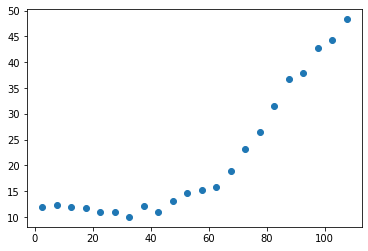

In [0]:
rmseDepth = rmseByDepth(y_test,y_pred)
rmseDepth.to_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/TFM/Results/depth_estimation/test-results/depth-rmse-LR.csv",index = False)
plt.scatter(rmseDepth['h'],rmseDepth['rmse'])

# Random Forest (RF)

In [39]:
((np.array([100,200,300,400,500])*3.6*3).sum()/60 + (np.array([100,200,300,400,500])*0.8*3).sum()/60)/60

5.5

In [30]:
((np.array([10,20,50,100,200])*4.3*5).sum()/60 + (np.array([10,20,50,100,200])*1.03*5).sum()/60)/60

2.8130555555555556

In [40]:
parameters = {"n_estimators":[5],"max_features":["auto","sqrt"]}
rfReg2 = GridSearchCV(rf(),parameters,cv = 3,scoring = "neg_root_mean_squared_error")
rfReg2.fit(X_train,y_train)


AttributeError: ignored

In [44]:
rfReg2.best_estimator_.feature_importances_

array([0.0613465 , 0.05990249, 0.20183818, 0.0719819 , 0.22758187,
       0.03467388, 0.07437154, 0.02813704, 0.01294819, 0.03473645,
       0.04033803, 0.05458623, 0.03899166, 0.04130841, 0.01725764])

In [28]:
parameters = {"n_estimators":[10,20,50,100,200],"max_features":["auto","sqrt"]}
rfReg = GridSearchCV(rf(),parameters,cv = 5,scoring = "neg_root_mean_squared_error")
rfReg.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [0]:
bestRF = rfReg.best_estimator_

In [0]:
y_pred_A = bestRF.predict(scaler.transform(X_test_A))
y_pred_B = bestRF.predict(scaler.transform(X_test_B))
y_pred_C = bestRF.predict(scaler.transform(X_test_C))
y_pred_G = bestRF.predict(scaler.transform(X_test_G))

In [0]:
print("Alto-Lindoso = R2: %0.2f, RMSE %0.3f" % (r2(y_test_A,y_pred_A),mse(y_test_A,y_pred_A,squared = False)))
print("Bubal = R2: %0.2f, RMSE %0.3f" % (r2(y_test_B,y_pred_B),mse(y_test_B,y_pred_B,squared = False)))
print("Canelles = R2: %0.2f, RMSE %0.3f" % (r2(y_test_C,y_pred_C),mse(y_test_C,y_pred_C,squared = False)))
print("Grado = R2: %0.2f, RMSE %0.3f" % (r2(y_test_G,y_pred_G),mse(y_test_G,y_pred_G,squared = False)))

Alto-Lindoso = R2: 0.66, RMSE 8.756
Bubal = R2: 0.81, RMSE 4.063
Canelles = R2: 0.74, RMSE 14.427
Grado = R2: 0.90, RMSE 4.983


In [0]:
y_test = np.array(pd.concat([y_test_A,y_test_B,y_test_C,y_test_G]))
y_pred = np.concatenate((y_pred_A,y_pred_B,y_pred_C,y_pred_G))

In [0]:
print("Total = R2: %0.2f, RMSE %0.3f" % (r2(y_test,y_pred),mse(y_test,y_pred,squared = False)))

Total = R2: 0.79, RMSE 10.953


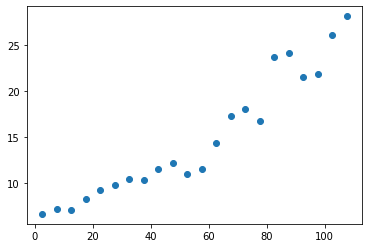

In [0]:
h = 2.5
delta = 2.5
jump = 5

hList = []
rmseList = []

while h < 110:
    hList.append(h)
    idx = np.where((y_test > h - delta) & (y_test < h + delta))
    rmse = mse(y_test[idx],y_pred[idx],squared = False)
    rmseList.append(rmse)
    #print("[%0.0f-%0.0f]: RMSE %0.3f" % (h - delta,h + delta,rmse))
    h = h + jump

plt.scatter(hList,rmseList)